# Import the libraries

In [249]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Load the BHP dataset 

In [250]:
df=pd.read_csv('ipl.csv')

# Understand each columns

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# Get the information of columns and note the observation

In [252]:
df.tail(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
806,1216542,Dubai,08-10-2020,JM Bairstow,Dubai International Cricket Stadium,0,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,69.0,N,NaN,AK Chaudhary,Nitin Menon
807,1216543,Dubai,14-10-2020,A Nortje,Dubai International Cricket Stadium,0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,13.0,N,NaN,AK Chaudhary,Nitin Menon
808,1216544,Dubai,25-10-2020,RD Gaikwad,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,Chennai Super Kings,wickets,8.0,N,NaN,C Shamshuddin,RK Illingworth
809,1216545,Abu Dhabi,26-09-2020,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,7.0,N,NaN,CB Gaffaney,VK Sharma
810,1216546,Dubai,20-10-2020,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,N,NaN,C Shamshuddin,RK Illingworth
811,1216547,Dubai,28-09-2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,05-11-2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,06-11-2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,08-11-2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


There are 815 rows in the dataset and some null values are also present

# Data Cleaning

1. Drop method,id and  nutral_venue columns as we dont need this columns for analysis
2. Find the null values and handle the null values
3. Change the data type of the values in result_margin column to integer
4. In eleminator columns change all Y's to 1 and all N's to 0

In [253]:
df=df.drop('method',axis=1)

In [254]:
df=df.drop('id',axis=1)

In [255]:
df['result_margin']=df['result_margin'].fillna(0)

In [256]:
df=df.astype({'result_margin':int})

In [257]:
df['eliminator']=df['eliminator'].map({'Y':1,'N':0})

In [258]:
df['eliminator']=df['eliminator'].fillna(0)

In [259]:
df=df.astype({'eliminator':int})

In [260]:
df

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,0,Asad Rauf,RE Koertzen
1,Chandigarh,19-04-2008,MEK Hussey,Punjab Cricket Association Stadium,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,0,MR Benson,SL Shastri
2,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,0,Aleem Dar,GA Pratapkumar
3,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,0,SJ Davis,DJ Harper
4,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,0,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Dubai,28-09-2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0,1,Nitin Menon,PR Reiffel
812,Dubai,05-11-2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57,0,CB Gaffaney,Nitin Menon
813,Abu Dhabi,06-11-2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6,0,PR Reiffel,S Ravi
814,Abu Dhabi,08-11-2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17,0,PR Reiffel,S Ravi


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             803 non-null    object
 1   date             816 non-null    object
 2   player_of_match  812 non-null    object
 3   venue            816 non-null    object
 4   neutral_venue    816 non-null    int64 
 5   team1            816 non-null    object
 6   team2            816 non-null    object
 7   toss_winner      816 non-null    object
 8   toss_decision    816 non-null    object
 9   winner           812 non-null    object
 10  result           812 non-null    object
 11  result_margin    816 non-null    int64 
 12  eliminator       816 non-null    int64 
 13  umpire1          816 non-null    object
 14  umpire2          816 non-null    object
dtypes: int64(3), object(12)
memory usage: 95.8+ KB


In [262]:
df.drop('neutral_venue',axis=1)

,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,0,Asad Rauf,RE Koertzen
1,Chandigarh,19-04-2008,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,0,MR Benson,SL Shastri
2,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,0,Aleem Dar,GA Pratapkumar
3,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,0,SJ Davis,DJ Harper
4,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,0,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Dubai,28-09-2020,AB de Villiers,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0,1,Nitin Menon,PR Reiffel
812,Dubai,05-11-2020,JJ Bumrah,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57,0,CB Gaffaney,Nitin Menon
813,Abu Dhabi,06-11-2020,KS Williamson,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6,0,PR Reiffel,S Ravi
814,Abu Dhabi,08-11-2020,MP Stoinis,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17,0,PR Reiffel,S Ravi


In [263]:
df=df.astype({'winner':str})
df=df.astype({'player_of_match':str})


1. How many matches are recorded in the dataset?
2. How many unique cities are matches played in?
3. Teams winning count
4. What is the most common toss decision?
5. How many matches were held at each venue?
6. Which player has won the "player of the match" award the most times?
7. How many matches had a margin of victory greater than 50 runs?


1. How many matches are recorded in the dataset?

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             803 non-null    object
 1   date             816 non-null    object
 2   player_of_match  816 non-null    object
 3   venue            816 non-null    object
 4   neutral_venue    816 non-null    int64 
 5   team1            816 non-null    object
 6   team2            816 non-null    object
 7   toss_winner      816 non-null    object
 8   toss_decision    816 non-null    object
 9   winner           816 non-null    object
 10  result           812 non-null    object
 11  result_margin    816 non-null    int64 
 12  eliminator       816 non-null    int64 
 13  umpire1          816 non-null    object
 14  umpire2          816 non-null    object
dtypes: int64(3), object(12)
memory usage: 95.8+ KB


2. How many unique cities are matches played in?

In [265]:

df['venue'].unique()

array(['M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium',
       'Feroz Shah Kotla', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium',
       'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium', 'Sardar Patel Stadium',
       'Barabati Stadium', 'Vidarbha Cricket Association Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association Stadiu

3. Teams winning count

In [266]:

df['winner'].value_counts()

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
nan                              4
Name: count, dtype: int64

4. What is the most common toss decision?

In [267]:

df['toss_decision'].max()

'field'

5. How many matches were held at each venue?

In [268]:
df['venue'].value_counts()

venue
M Chinnaswamy Stadium                                  80
Eden Gardens                                           77
Feroz Shah Kotla                                       74
Wankhede Stadium                                       73
Rajiv Gandhi International Stadium                     64
MA Chidambaram Stadium                                 57
Punjab Cricket Association Stadium                     56
Sawai Mansingh Stadium                                 47
Dubai International Cricket Stadium                    33
Sheikh Zayed Stadium                                   29
Maharashtra Cricket Association Stadium                21
Sharjah Cricket Stadium                                18
Dr DY Patil Sports Academy                             17
Subrata Roy Sahara Stadium                             17
Kingsmead                                              15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    13
SuperSport Park                                        12
Sardar P

6. Which player has won the "player of the match" award the most times?

In [269]:

df['player_of_match'].value_counts().max()

np.int64(23)

7. How many matches had a margin of victory greater than 50 runs?

In [270]:

g=df.query("result=='runs'")['result_margin']>50
g.value_counts().max()

np.int64(302)

8. What is the average result margin (runs or wickets)?


In [271]:
df.query("result=='runs'")['result_margin'].mean()
df.query("result=='wickets'")['result_margin'].mean()

np.float64(6.287356321839081)

9. How many matches went into an eliminator?

In [272]:
df.query("eliminator==1").value_counts().shape[0]

13

10. Which team won the toss most frequently?


In [273]:
df['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Rajasthan Royals                87
Royal Challengers Bangalore     87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

11. How many matches were won by batting first versus fielding first?


In [274]:
pd.pivot_table(df,index='toss_decision',values='winner',aggfunc='count')

,winner
toss_decision,
bat,320
field,496


12. How many different umpires have officiated the matches?


In [275]:
df['umpire1'].value_counts().count()+df['umpire2'].value_counts().count()

np.int64(95)

13. Is there a relationship between the toss winner and the match winner?


In [276]:
df

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,0,Asad Rauf,RE Koertzen
1,Chandigarh,19-04-2008,MEK Hussey,Punjab Cricket Association Stadium,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,0,MR Benson,SL Shastri
2,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,0,Aleem Dar,GA Pratapkumar
3,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,0,SJ Davis,DJ Harper
4,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,0,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Dubai,28-09-2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0,1,Nitin Menon,PR Reiffel
812,Dubai,05-11-2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57,0,CB Gaffaney,Nitin Menon
813,Abu Dhabi,06-11-2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6,0,PR Reiffel,S Ravi
814,Abu Dhabi,08-11-2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17,0,PR Reiffel,S Ravi


14. How has the number of matches varied over the years?

In [277]:

pd.pivot_table(df,index='winner',values='toss_winner',aggfunc='count')

,toss_winner
winner,
Chennai Super Kings,106
Deccan Chargers,29
Delhi Capitals,19
Delhi Daredevils,67
Gujarat Lions,13
Kings XI Punjab,88
Kochi Tuskers Kerala,6
Kolkata Knight Riders,99
Mumbai Indians,120


1. Which teams have won the most matches over the years?

In [278]:
g=df['winner'].value_counts()

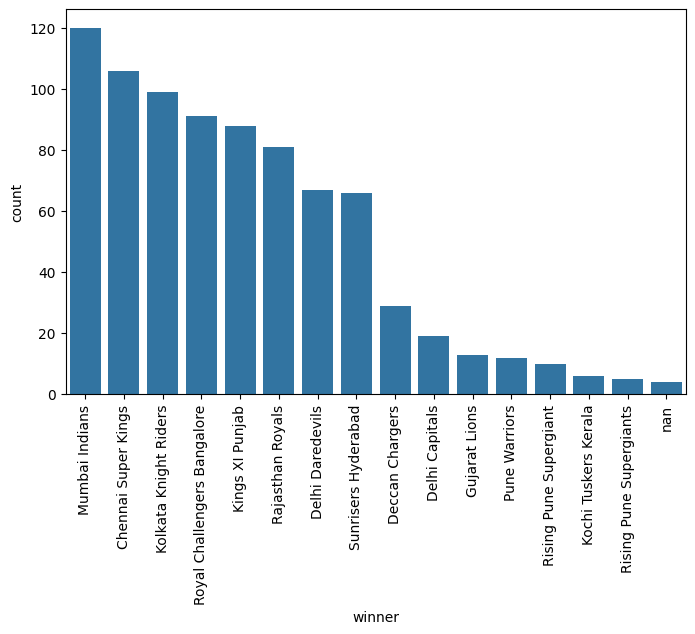

In [279]:
plt.figure(figsize=(8,5))
sns.barplot(data=g)
plt.xticks(rotation=90)
plt.show()

This shows us that Mumbai Indians have won most number of matches

2.How frequently do teams win after winning the toss?

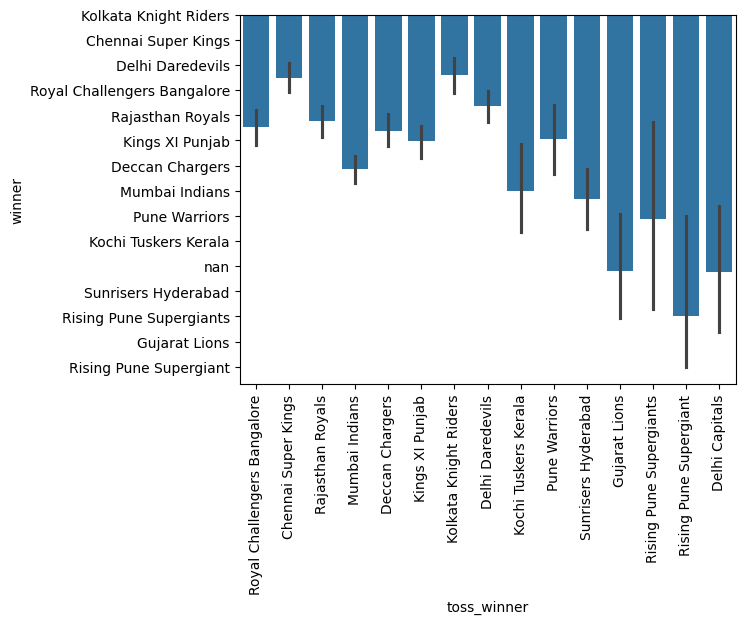

In [280]:
sns.barplot(data=df,x='toss_winner',y='winner')
plt.xticks(rotation=90)
plt.show()

This shows that RPSG have won more matches when they won toss

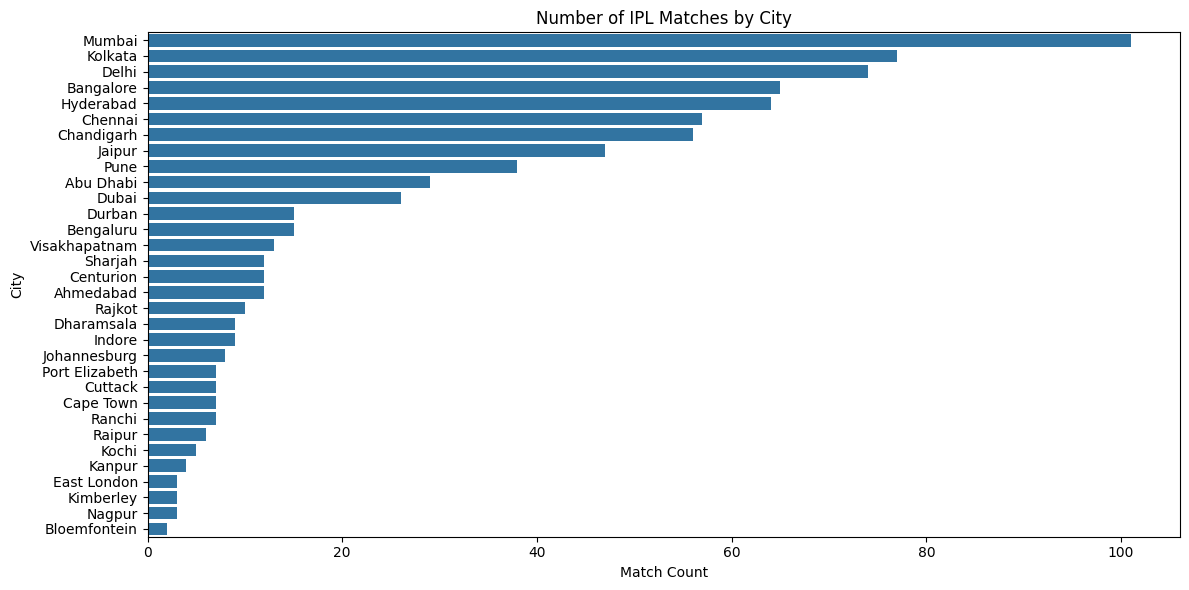

In [281]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='city', order=df['city'].value_counts().index)
plt.title('Number of IPL Matches by City')
plt.xlabel('Match Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Mumbai hosted the most number of matches

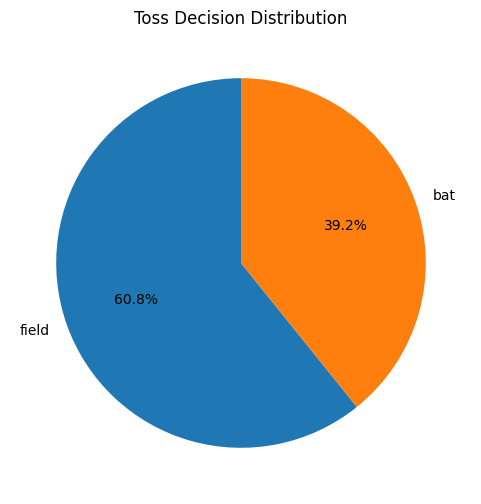

In [282]:
plt.figure(figsize=(6, 6))
td=df['toss_decision'].value_counts()
plt.pie(td.values,autopct='%1.1f%%',labels=td.index, startangle=90)
plt.title('Toss Decision Distribution')
plt.show()

This tells us that teams preffer fielding  first when won toss

C:\Users\Varun\AppData\Local\Temp\ipykernel_8308\1233171700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette='viridis')


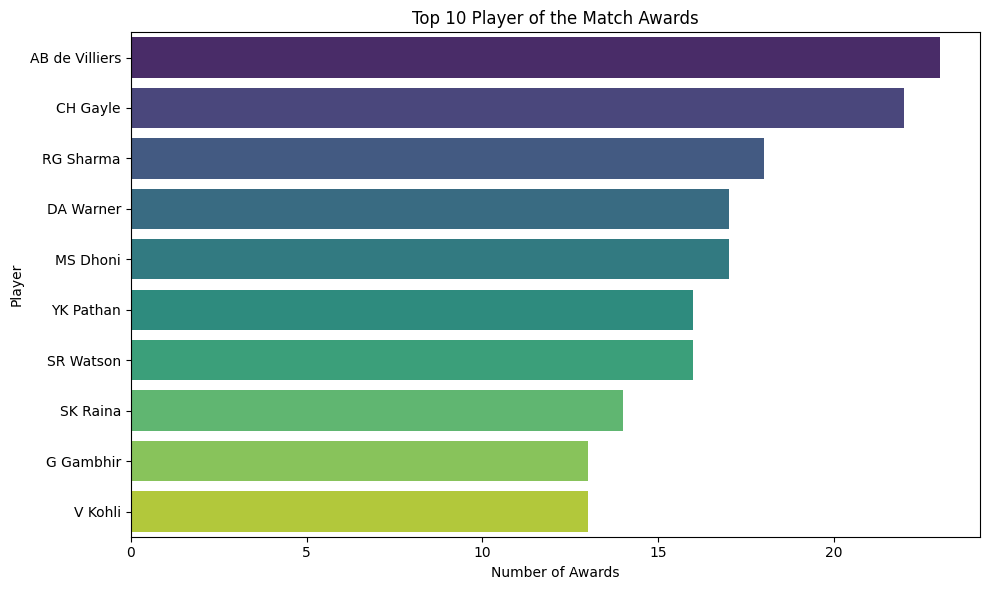

In [283]:
top_players = df['player_of_match'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index, palette='viridis')
plt.title('Top 10 Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

Ab de villiers has won the most POMs

# Conclution

This gives us a deeper understanding about which teams have won how many matches in related to toss and venue